In [ ]:
import numpy as np
import pandas as pd

In [ ]:
upload= pd.read_excel('sample_data/clustering_result.xlsx')

In [ ]:
upload

,Unnamed: 0,대지위치,X,Y,내진설계적용여부,고도,수용인원,earthquake_count,nearest_hospital_distance,의원수,Convenience_Stores_within_300m,반경 1km 산불 횟수,연식_일,Cluster,Unnamed: 14
0,0.0,대구광역시 중구 향촌동 34-1번지,128.593023,35.873461,1,43.0,562.0,0.0,1.571409,76.0,4.0,0.0,7639,2.0,NaN
1,3.0,대구광역시 중구 태평로3가 214-39번지,128.589980,35.876739,1,40.0,175.0,0.0,1.729684,9.0,3.0,0.0,3548,2.0,NaN
2,4.0,대구광역시 중구 태평로3가 214-28번지,128.589824,35.876587,1,40.0,205.0,0.0,1.785604,9.0,3.0,0.0,3544,2.0,NaN
3,5.0,대구광역시 중구 태평로3가 214-14번지,128.589869,35.876758,1,40.0,176.0,0.0,1.785604,9.0,3.0,0.0,3558,2.0,NaN
4,6.0,대구광역시 중구 태평로2가 37-7번지,128.592998,35.875994,1,46.0,729.0,0.0,1.430037,25.0,6.0,0.0,7733,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,NaN,NaN,NaN,NaN,PCA3 -0.228384 0.342112 -0.486305 ...,NaN,NaN,NaN,PCA3 -0.049822 -0.203871...,NaN,NaN,NaN,NaN,NaN,NaN
248,NaN,NaN,NaN,NaN,PCA4 -0.386949 0.636180 0.191457 ...,NaN,NaN,NaN,PCA4 0.069789 0.056756...,NaN,NaN,NaN,NaN,NaN,NaN
249,NaN,NaN,NaN,NaN,PCA5 0.353870 0.595747 0.143611 ...,NaN,NaN,NaN,PCA5 0.140533 0.464292...,NaN,NaN,NaN,NaN,NaN,NaN
250,NaN,NaN,NaN,NaN,PCA6 -0.180701 -0.256913 0.531536 ...,NaN,NaN,NaN,PCA6 0.056558 0.321727...,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# IQR 계산
Q1 = upload['수용인원'].quantile(0.25)  # 1분위수
Q3 = upload['수용인원'].quantile(0.75)  # 3분위수
IQR = Q3 - Q1  # IQR 계산

# 이상치 기준 설정 (1.5 * IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# IQR 기준 이상치 제거
upload = upload[(upload['수용인원'] >= lower_bound) & (upload['수용인원'] <= upper_bound)]

# 결과 확인
print(f"IQR 기준 이상치 제거 후 데이터 크기: {upload.shape}")

IQR 기준 이상치 제거 후 데이터 크기: (220, 15)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMax Scaling을 적용할 칼럼 리스트
columns_to_scale = ['수용인원', 'nearest_hospital_distance', '고도', '연식_일', '의원수', 'Convenience_Stores_within_300m', 'earthquake_count']

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 특정 칼럼들에 MinMax Scaling 적용
upload[columns_to_scale] = scaler.fit_transform(upload[columns_to_scale])

# 결과 확인
print(upload.head())



   Unnamed: 0                     대지위치           X          Y 내진설계적용여부  \
0         0.0      대구광역시 중구 향촌동 34-1번지  128.593023  35.873461        1   
1         3.0  대구광역시 중구 태평로3가 214-39번지  128.589980  35.876739        1   
2         4.0  대구광역시 중구 태평로3가 214-28번지  128.589824  35.876587        1   
3         5.0  대구광역시 중구 태평로3가 214-14번지  128.589869  35.876758        1   
4         6.0    대구광역시 중구 태평로2가 37-7번지  128.592998  35.875994        1   

         고도      수용인원  earthquake_count  nearest_hospital_distance       의원수  \
0  0.059361  0.359948               0.0                   0.037414  0.378109   
1  0.052511  0.110753               0.0                   0.041183  0.044776   
2  0.052511  0.130071               0.0                   0.042514  0.044776   
3  0.052511  0.111397               0.0                   0.042514  0.044776   
4  0.066210  0.467482               0.0                   0.034048  0.124378   

   Convenience_Stores_within_300m  반경 1km 산불 횟수      연식_일  Cluster  \
0   

<ipython-input-7-ca723c992f1a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upload[columns_to_scale] = scaler.fit_transform(upload[columns_to_scale])


In [ ]:
# 예를 들어, 'col1'과 'col2'라는 칼럼의 값을 사용해 계산한다고 가정
# score = col1 * 0.4 + col2 * 0.6

upload['score'] = upload['수용인원'] * 0.3 + upload['nearest_hospital_distance'] * 0.2 + upload['고도'] * 0.15 + upload['연식_일'] * 0.15 + upload['의원수'] * 0.1 + upload['Convenience_Stores_within_300m'] * 0.1 + upload['earthquake_count'] * 0.1

# 결과 확인
print(upload.head())


   Unnamed: 0                     대지위치           X          Y 내진설계적용여부  \
0         0.0      대구광역시 중구 향촌동 34-1번지  128.593023  35.873461        1   
1         3.0  대구광역시 중구 태평로3가 214-39번지  128.589980  35.876739        1   
2         4.0  대구광역시 중구 태평로3가 214-28번지  128.589824  35.876587        1   
3         5.0  대구광역시 중구 태평로3가 214-14번지  128.589869  35.876758        1   
4         6.0    대구광역시 중구 태평로2가 37-7번지  128.592998  35.875994        1   

         고도      수용인원  earthquake_count  nearest_hospital_distance       의원수  \
0  0.059361  0.359948               0.0                   0.037414  0.378109   
1  0.052511  0.110753               0.0                   0.041183  0.044776   
2  0.052511  0.130071               0.0                   0.042514  0.044776   
3  0.052511  0.111397               0.0                   0.042514  0.044776   
4  0.066210  0.467482               0.0                   0.034048  0.124378   

   Convenience_Stores_within_300m  반경 1km 산불 횟수      연식_일  Cluster  \
0   

<ipython-input-8-160620faa7a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upload['score'] = upload['수용인원'] * 0.3 + upload['nearest_hospital_distance'] * 0.2 + upload['고도'] * 0.15 + upload['연식_일'] * 0.15 + upload['의원수'] * 0.1 + upload['Convenience_Stores_within_300m'] * 0.1 + upload['earthquake_count'] * 0.1


In [ ]:
upload['score']

,score
0,0.279039
1,0.110494
2,0.116499
3,0.111094
4,0.292370
...,...
231,0.321701
232,0.277748
233,0.258661
234,0.354373


In [ ]:
# 'score' 칼럼의 기초 통계량 확인
print(upload['score'].describe())


count    220.000000
mean       0.257979
std        0.065900
min        0.069731
25%        0.224394
50%        0.261153
75%        0.294485
max        0.447544
Name: score, dtype: float64


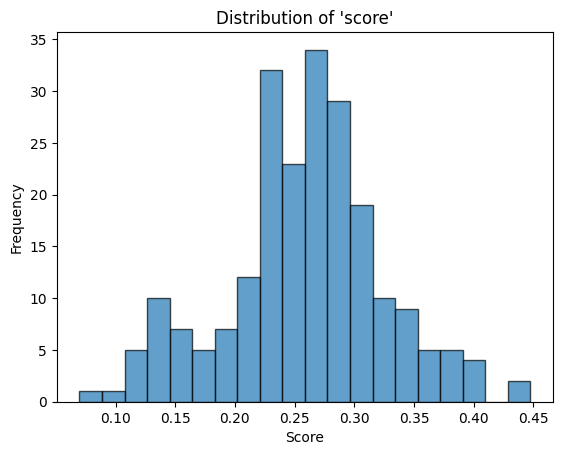

In [ ]:
import matplotlib.pyplot as plt

# 히스토그램 그리기
plt.hist(upload['score'], bins=20, edgecolor='k', alpha=0.7)
plt.title("Distribution of 'score'")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()


In [14]:
upload.to_excel('sample_data/score.xlsx', index=False)

In [15]:
# 상위 10% 데이터를 추출하는 함수
def top_10_percent(group):
    threshold = group['score'].quantile(0.9)  # 상위 10% 기준 값
    return group[group['score'] > threshold]

# 클러스터별로 상위 10% 데이터 추출
top_10_percent_data = upload.groupby('Cluster', group_keys=False).apply(top_10_percent)

# 결과 확인
print(top_10_percent_data)


     Unnamed: 0                       대지위치           X          Y 내진설계적용여부  \
194       342.0      대구광역시 달서구 호산동 708-4번지  128.487156  35.842905        1   
197       345.0       대구광역시 달서구 호림동 19-2번지  128.490893  35.838554        1   
200       348.0       대구광역시 달서구 호림동 18-4번지  128.490837  35.836617        1   
218       370.0     대구광역시 달서구 이곡동 1200-3번지  128.506104  35.854553        1   
219       371.0     대구광역시 달서구 이곡동 1200-2번지  128.505794  35.854491        1   
57         71.0       대구광역시 수성구 범어동 42-1번지  128.624267  35.859792        1   
146       239.0       대구광역시 동구 신천동 297-8번지  128.627139  35.868872        1   
159       258.0       대구광역시 동구 상매동 506-6번지  128.705747  35.888553        1   
162       264.0       대구광역시 동구 상매동 505-9번지  128.705849  35.887660        1   
164       266.0       대구광역시 동구 상매동 505-3번지  128.707000  35.888816        1   
31         35.0     대구광역시 중구 삼덕동2가 128-1번지  128.601187  35.866400        1   
33         37.0     대구광역시 중구 삼덕동2가 116-1번지  128.601950  35.86627

<ipython-input-15-b6e89dc8f760>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_percent_data = upload.groupby('Cluster', group_keys=False).apply(top_10_percent)


In [16]:
# 상위 20% 데이터를 추출하는 함수
def top_20_percent(group):
    threshold = group['score'].quantile(0.8)  # 상위 20% 기준 값
    return group[group['score'] > threshold]

# 클러스터별로 상위 20% 데이터 추출
top_20_percent_data = upload.groupby('Cluster', group_keys=False).apply(top_20_percent)

# 결과 확인
print(top_20_percent_data)


     Unnamed: 0                       대지위치           X          Y 내진설계적용여부  \
194       342.0      대구광역시 달서구 호산동 708-4번지  128.487156  35.842905        1   
196       344.0     대구광역시 달서구 호산동 708-10번지  128.487343  35.842670        1   
197       345.0       대구광역시 달서구 호림동 19-2번지  128.490893  35.838554        1   
200       348.0       대구광역시 달서구 호림동 18-4번지  128.490837  35.836617        1   
212       361.0      대구광역시 달서구 호림동 11-13번지  128.489399  35.838551        1   
217       369.0     대구광역시 달서구 이곡동 1200-5번지  128.505792  35.854257        1   
218       370.0     대구광역시 달서구 이곡동 1200-3번지  128.506104  35.854553        1   
219       371.0     대구광역시 달서구 이곡동 1200-2번지  128.505794  35.854491        1   
220       372.0     대구광역시 달서구 이곡동 1200-1번지  128.505495  35.854492        1   
57         71.0       대구광역시 수성구 범어동 42-1번지  128.624267  35.859792        1   
62         79.0       대구광역시 수성구 두산동 95-4번지  128.622247  35.839361        1   
91        144.0        대구광역시 북구 산격동 1682번지  128.614026  35.90591

<ipython-input-16-d4c822362a50>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_20_percent_data = upload.groupby('Cluster', group_keys=False).apply(top_20_percent)


In [18]:
# 필요하면 엑셀로 저장
output_file_path = '/content/top_10_percent_clusters.xlsx'
top_10_percent_data.to_excel(output_file_path, index=False)
print(f"Filtered data has been saved to {output_file_path}")

Filtered data has been saved to /content/top_10_percent_clusters.xlsx


In [19]:
# 필요하면 엑셀로 저장
output_file_path = '/content/top_20_percent_clusters.xlsx'
top_20_percent_data.to_excel(output_file_path, index=False)
print(f"Filtered data has been saved to {output_file_path}")

Filtered data has been saved to /content/top_20_percent_clusters.xlsx


In [20]:
# 클러스터별로 score 상위 10개 데이터 추출
top_10_per_cluster = upload.groupby('Cluster', group_keys=False).apply(lambda x: x.nlargest(10, 'score'))

# 결과 확인
print(top_10_per_cluster)

     Unnamed: 0                       대지위치           X          Y 내진설계적용여부  \
218       370.0     대구광역시 달서구 이곡동 1200-3번지  128.506104  35.854553        1   
219       371.0     대구광역시 달서구 이곡동 1200-2번지  128.505794  35.854491        1   
200       348.0       대구광역시 달서구 호림동 18-4번지  128.490837  35.836617        1   
194       342.0      대구광역시 달서구 호산동 708-4번지  128.487156  35.842905        1   
197       345.0       대구광역시 달서구 호림동 19-2번지  128.490893  35.838554        1   
212       361.0      대구광역시 달서구 호림동 11-13번지  128.489399  35.838551        1   
220       372.0     대구광역시 달서구 이곡동 1200-1번지  128.505495  35.854492        1   
217       369.0     대구광역시 달서구 이곡동 1200-5번지  128.505792  35.854257        1   
196       344.0     대구광역시 달서구 호산동 708-10번지  128.487343  35.842670        1   
183       328.0      대구광역시 달서구 호산동 713-3번지  128.489108  35.841698        1   
146       239.0       대구광역시 동구 신천동 297-8번지  128.627139  35.868872        1   
164       266.0       대구광역시 동구 상매동 505-3번지  128.707000  35.88881

<ipython-input-20-8685c4390097>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_per_cluster = upload.groupby('Cluster', group_keys=False).apply(lambda x: x.nlargest(10, 'score'))


# **클러스터별 특성 기여도 산출**

In [24]:
# 클러스터별 PCA 주성분 가중치 평균
cluster_means = {
    "Cluster 0": np.array([-0.421810, 1.739013, -0.995074, 0.248170, 0.353026, 0.499470, -0.119834]),
    "Cluster 1": np.array([-0.517797, -0.368719, 1.418310, -0.692440, 0.380314, 0.563135, 0.215416]),
    "Cluster 2": np.array([0.298368, -0.426743, -0.143241, 0.144416, -0.232691, -0.337258, -0.031566]),
}

# PCA 구성 요소의 원본 특성 가중치 (CSV 파일로부터 로드)
file_path = 'sample_data/weight_per_pca.csv'
pca_weights = pd.read_csv(file_path, encoding='euc-kr').set_index('Unnamed: 0')  # 'Unnamed: 0' 열을 인덱스로 설정

# 클러스터별 원본 특성 기여도 계산
cluster_contributions = {}

for cluster, means in cluster_means.items():
    # PCA 구성 요소의 가중치와 클러스터 평균 곱하기
    contribution = pca_weights.mul(means, axis=0).sum(axis=0)
    cluster_contributions[cluster] = contribution

# 결과를 데이터프레임으로 정리
contributions_df = pd.DataFrame(cluster_contributions)

# 결과 출력
print(contributions_df)



                                Cluster 0  Cluster 1  Cluster 2
고도                              -0.526481   0.176718   0.108308
수용인원                             0.043466   0.227817  -0.086729
earthquake_count                 1.729016  -0.559157  -0.362499
nearest_hospital_distance        0.006933  -0.310881   0.097587
의원수                             -0.725443  -0.170200   0.281994
Convenience_Stores_within_300m   0.222301  -0.226812   0.003107
반경 1km 산불 횟수                    -0.502563   1.660998  -0.375488
연식_일                             0.725194   0.286500  -0.319236


In [25]:
# 파일로 저장하려면 아래 코드를 사용
contributions_df.to_csv("/content/cluster_contributions.csv", encoding='euc-kr')